<a id = "Table_of_content"></a>
# Table of content
### 1. [Data Cleaning](#T1)
### 2. [Build the model](#T3)

# Objective
* predict the probability that a customer does not pay back their credit card balance

<a id = "T1"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Data Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('train_1013.csv',nrows = 160000)  
df_label = pd.read_csv("label_1013.csv",nrows = 160000)

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Columns: 1501 entries, Diff_date_0 to D_145_9
dtypes: float64(1501)
memory usage: 1.8 GB


In [4]:
df_train.head(5)

,Diff_date_0,num_date,P_2_0,D_39_0,B_1_0,B_2_0,R_1_0,D_41_0,B_3_0,D_44_0,...,D_130_9,D_131_9,D_133_9,R_28_9,D_139_9,D_140_9,D_141_9,D_143_9,D_144_9,D_145_9
0,0.040431,1.0,0.960384,0.002455,0.013683,1.002700,0.001373,0.000685,0.005531,0.006406,...,0.004186,0.005702,0.006210,0.002715,0.007186,0.004234,0.005086,0.005810,0.002970,0.008533
1,0.129380,1.0,0.919253,0.213193,0.031170,1.008534,0.008996,0.009513,0.005360,0.001658,...,0.002202,0.001928,0.002996,0.001701,0.002980,0.007479,0.007870,0.003284,0.003169,0.008514
2,0.075472,1.0,0.852514,0.006877,0.007627,0.819987,0.009290,0.003959,0.007532,0.004571,...,0.002654,0.003470,0.009881,0.007691,0.007383,0.006623,0.000964,0.002202,0.000834,0.003444
3,0.067385,1.0,0.581547,0.093481,0.172628,1.003796,0.009453,0.003694,0.002178,0.003493,...,0.000060,0.004576,0.001789,0.005140,0.002704,0.006184,0.001899,0.008183,0.005560,0.002983
4,0.059299,1.0,0.935854,0.003535,0.005764,0.810966,0.004223,0.000970,0.008519,0.000342,...,1.006119,0.008897,0.005045,0.003706,0.002974,0.004162,0.005764,0.008154,0.006944,0.000905


In [9]:
df_num_date = df_train["num_date"] / 5
df_train = df_train.drop(columns =["num_date"])

df_train.insert(2,"num_date1",df_num_date)
df_train.insert(358,"num_date2",df_num_date)
df_train.insert(716,"num_date3",df_num_date)
df_train.insert(1078,"num_date4",df_num_date)
df_train.insert(1432,"num_date5",df_num_date)

row, col = df_train.shape
df_train = np.reshape(df_train.to_numpy(),(-1,5,301))
df_train.shape

(160000, 5, 301)

<a id = "T3"></a></a><div style="text-align: right"> <a href=#Table_of_content>Back?</a> </div>
# Build the model

In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.layers import Conv1D,Conv2D, MaxPooling2D, Flatten,Dropout
from keras.callbacks import EarlyStopping

In [11]:
def process_x_y_train_valid(df_train, df_label, s):
    x_train = df_train[: int(df_train.shape[0] * 0.80)][..., None]
    x_valid = df_train[int(df_train.shape[0] * 0.80):][..., None]

    y_train = df_label[: int(df_label.shape[0] * 0.80)].to_numpy()
    y_train = np.reshape(y_train, (y_train.shape[0],))
    y_train = tf.one_hot(y_train, 2)
    
    y_valid = df_label[int(df_label.shape[0] * 0.80):].to_numpy()
    y_valid = np.reshape(y_valid, (y_valid.shape[0],))
    y_valid = tf.one_hot(y_valid, 2)
    
    print(f"For train dataset {s}: ", x_train.shape, y_train.shape)
    print(f"For validation dataset {s}: ", x_valid.shape, y_valid.shape,"\n")
    return x_train, y_train, x_valid, y_valid

In [12]:
x_train1013, y_train1013, x_valid1013, y_valid1013 = process_x_y_train_valid(df_train, df_label, "10_13")
del df_train

For train dataset 10_13:  (128000, 5, 301, 1) (128000, 2)
For validation dataset 10_13:  (32000, 5, 301, 1) (32000, 2) 



In [30]:
def create_ANN(input_data):
    
    model = Sequential()
    model.add(Conv2D(64, (2,2), activation = 'relu', input_shape = input_data.shape[1:] ))
    model.add(MaxPooling2D())
    model.add(Conv2D(64, (2,2), activation = 'relu'))
#     model.add(MaxPooling2D())
    model.add(Flatten())
    model.add(Dense(64, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation = 'relu'))    
    model.add(Dropout(0.5))
    model.add(Dense(2, activation = 'softmax'))
    
    return model

Way to write the model to json file: https://machinelearningmastery.com/save-load-keras-deep-learning-models/   

In [31]:
ANN_10_13 = create_ANN(x_train1013)
print(ANN_10_13.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 4, 300, 64)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 2, 150, 64)       0         
 2D)                                                             
                                                                 
 conv2d_13 (Conv2D)          (None, 1, 149, 64)        16448     
                                                                 
 flatten_4 (Flatten)         (None, 9536)              0         
                                                                 
 dense_12 (Dense)            (None, 64)                610368    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                      

In [32]:
callbacks = [EarlyStopping(monitor = 'val_accuracy', patience = 3, min_delta = 0, mode = 'auto')]
ANN_10_13.compile(loss = tf.keras.losses.BinaryCrossentropy(), optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001), metrics = ['accuracy'])

# Try with callback
history = ANN_10_13.fit(x_train1013, y_train1013, batch_size = 64, epochs = 50, 
                        validation_data = (x_valid1013, y_valid1013), verbose=1, callbacks = callbacks)

Epoch 1/50
2000/2000 [==============================] - 136s 68ms/step - loss: 0.2721 - accuracy: 0.8914 - val_loss: 0.2318 - val_accuracy: 0.8993
Epoch 2/50
2000/2000 [==============================] - 134s 67ms/step - loss: 0.2502 - accuracy: 0.8999 - val_loss: 0.2410 - val_accuracy: 0.8994
Epoch 3/50
2000/2000 [==============================] - 136s 68ms/step - loss: 0.2473 - accuracy: 0.9007 - val_loss: 0.2432 - val_accuracy: 0.8978
Epoch 4/50
2000/2000 [==============================] - 136s 68ms/step - loss: 0.2504 - accuracy: 0.9011 - val_loss: 0.2649 - val_accuracy: 0.8992
Epoch 5/50
2000/2000 [==============================] - 137s 68ms/step - loss: 0.2439 - accuracy: 0.9015 - val_loss: 0.2436 - val_accuracy: 0.9003
Epoch 6/50
2000/2000 [==============================] - 138s 69ms/step - loss: 0.2431 - accuracy: 0.9012 - val_loss: 0.2400 - val_accuracy: 0.8980
Epoch 7/50
2000/2000 [==============================] - 137s 68ms/step - loss: 0.2453 - accuracy: 0.9019 - val_loss: 0

In [33]:
ANN_10_13.save("ANN1013_2.h5")

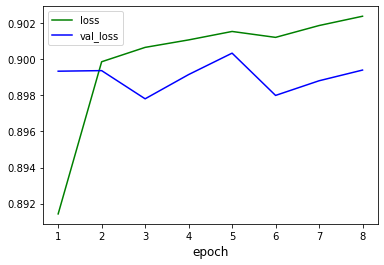

In [34]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(history.history['loss']) + 1), history.history['accuracy'],label="loss", color = 'g')
plt.plot(range(1,len(history.history['loss']) + 1), history.history['val_accuracy'],label="val_loss", color = 'b')
plt.xlabel('epoch', fontsize = 12)
plt.legend()

In [35]:
from sklearn.metrics import f1_score, accuracy_score

def get_score(filename):
    ANN_model = tf.keras.models.load_model(filename)
    result1 =  ANN_model.predict(x_valid1013)
    print("For model",filename)
    print("F1-score:",f1_score(np.argmax(result1,axis=1), np.argmax(y_valid1013,axis=1)))
    print("Accuracy:",accuracy_score(np.argmax(result1,axis=1), np.argmax(y_valid1013,axis=1)))
    print("")

get_score("ANN1013_1.h5")
get_score("ANN1013_2.h5")

For model ANN1013_1.h5
F1-score: 0.7880625168418216
Accuracy: 0.9016875

For model ANN1013_2.h5
F1-score: 0.7986740884357996
Accuracy: 0.89940625

